# 2) Packages

In [1]:
require(RCurl) #To read databases from htlm websites
require(car) #Scatterplots

Loading required package: RCurl
Loading required package: bitops
Loading required package: car
Loading required package: carData


# 3) Data handling

## a) Codebook

In [2]:
# group
# obs
# arc: bike lane 
# period: periods of 15 minutes of data collection
# length: length of the bike lane
# ff_tt: free frow travel time
# tt: travel time
# ncyclists: cyclist counted in each 15 minutes period.

## b) Data reading

In [3]:
df<-read.csv(text=getURL("https://raw.githubusercontent.com/paguarda/FIT/master/Taller2/data.csv"), fill = TRUE, header = TRUE,na.strings=c("NA","NaN", " "))

In [4]:
head(df)

group,obs,arc,period,dir,length,ff_tt,tt,ncyclists
2,1,2,1,1,140,20.21,27.91,2
2,2,2,2,1,140,20.21,26.71,3
2,3,2,3,1,140,20.21,20.41,4
2,4,2,4,1,140,20.21,23.89,2
2,5,2,5,1,140,20.21,18.83,2
2,6,2,6,1,140,20.21,20.25,5


## c) Data formatting

### Units

In [5]:
#Length
df$length <- df$length/1000 #km

#Flow
df$flow <- df$ncyclists*4 #number of cyclists per hour
max_flow <- 2000 #cyclists/hr

#Travel time
df$tt <- as.numeric(as.character(df$tt))
df$tt <- df$tt/3600 #hr

#Free flow travel time
df$ff_tt <- as.numeric(as.character(df$ff_tt))
df$ff_tt <- df$ff_tt/3600 #hr

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”

###  New variables

In [6]:
df$ff_speed <- df$length/df$tt #Free flow speed

In [7]:
df$t_speed <- df$ff_speed/2*(1+sqrt(1-df$flow/max_flow)) #Theorethical speed

In [8]:
df$t_tt <- df$length/df$t_speed #Theorethical travel time 

# 4) Descriptive statistics

In [9]:
summary(df)

     group        obs              arc        period          dir     
 Min.   :2   Min.   : 1.000   Min.   :1   Min.   :1.00   Min.   :1.0  
 1st Qu.:3   1st Qu.: 4.000   1st Qu.:2   1st Qu.:2.75   1st Qu.:1.0  
 Median :5   Median : 7.500   Median :4   Median :4.50   Median :1.5  
 Mean   :5   Mean   : 7.929   Mean   :4   Mean   :4.50   Mean   :1.5  
 3rd Qu.:7   3rd Qu.:12.000   3rd Qu.:6   3rd Qu.:6.25   3rd Qu.:2.0  
 Max.   :8   Max.   :16.000   Max.   :7   Max.   :8.00   Max.   :2.0  
                                                                      
     length           ff_tt                tt             ncyclists     
 Min.   :0.0540   Min.   :0.002028   Min.   :0.000000   Min.   : 0.000  
 1st Qu.:0.0900   1st Qu.:0.003694   1st Qu.:0.004500   1st Qu.: 3.000  
 Median :0.1000   Median :0.004193   Median :0.005639   Median : 6.000  
 Mean   :0.1039   Mean   :0.004162   Mean   :0.005636   Mean   : 6.911  
 3rd Qu.:0.1300   3rd Qu.:0.004528   3rd Qu.:0.006861   3rd Qu.:10.

# 5) Regression

## BPR variables

### Dependent variable 

In [12]:
df$yBPR <- with(df,log(tt-ff_tt)) #(based on real travel times)

Warning message in log(tt - ff_tt):
“Se han producido NaNs”

In [14]:
df$ytBPR <- with(df,log(t_tt-ff_tt)) #(based on theoretical travel times)

Warning message in log(t_tt - ff_tt):
“Se han producido NaNs”

### Independent variable

In [15]:
df$xBPR <- with(df,flow/max_flow) 

### Removing Na's

In [16]:
df <- subset(df,!is.na(yBPR) & yBPR != -Inf)
df <- subset(df,!is.na(xBPR))

### Linear regression

#### Regular

In [17]:
lmBPR_all <- lm(yBPR~xBPR, data = subset(df))

In [18]:
summary(lmBPR_all)


Call:
lm(formula = yBPR ~ xBPR, data = subset(df))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4923 -0.5112  0.1769  0.6693  2.3125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.1255     0.1807 -39.434   <2e-16 ***
xBPR         21.0275    10.2338   2.055   0.0425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.016 on 102 degrees of freedom
Multiple R-squared:  0.03975,	Adjusted R-squared:  0.03033 
F-statistic: 4.222 on 1 and 102 DF,  p-value: 0.04246


#### Fixed effects

In [19]:
lmBPR_FE <- lm(yBPR~factor(group)+xBPR, data = subset(df))

In [20]:
summary(lmBPR_FE)


Call:
lm(formula = yBPR ~ factor(group) + xBPR, data = subset(df))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0726 -0.2997  0.0556  0.4533  1.7142 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7.4896     0.2697 -27.769  < 2e-16 ***
factor(group)3  -0.2731     0.3256  -0.839 0.403731    
factor(group)4   0.8201     0.3240   2.531 0.012995 *  
factor(group)5   0.1390     0.3416   0.407 0.684975    
factor(group)6   0.2480     0.3351   0.740 0.461039    
factor(group)7   0.9736     0.3293   2.957 0.003912 ** 
factor(group)8   1.1837     0.3294   3.594 0.000517 ***
xBPR            15.4629     9.2120   1.679 0.096491 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9013 on 96 degrees of freedom
Multiple R-squared:  0.2887,	Adjusted R-squared:  0.2369 
F-statistic: 5.568 on 7 and 96 DF,  p-value: 2.108e-05


# 6) Plots

## Function to make predictions according to BPR

In [21]:


bpr_prediction <- function(group, regression){
    
    qmax <- 2000
    tf <- mean(df[df$group == group,]$ff_tt)
    
    alpha <- exp(as.numeric(regression$coefficients[1]))/(tf)
    beta <- regression$coefficients[2]
    
    xCurve_flow <- seq(1, 2000, 10)
    yCurve_tt <- tf*(1+alpha*(xCurve_flow/qmax)^(beta))
    
    return(data.frame(group, xCurve_flow,yCurve_tt))
    
}


## BPR Curves

In [22]:
BPRCurveByGroup <- lapply(2:8, function(i) bpr_prediction(group = i, regression = lmBPR_all))
                          
xCurve_flow <- BPRCurveByGroup[[2]][[2]]

yCurve_tt_g1 <- BPRCurveByGroup[[1]][[3]]
yCurve_tt_g2 <- BPRCurveByGroup[[2]][[3]]
yCurve_tt_g3 <- BPRCurveByGroup[[3]][[3]]
yCurve_tt_g4 <- BPRCurveByGroup[[4]][[3]]
yCurve_tt_g5 <- BPRCurveByGroup[[5]][[3]]
yCurve_tt_g6 <- BPRCurveByGroup[[6]][[3]]
yCurve_tt_g7 <- BPRCurveByGroup[[7]][[3]]


## Plots by group

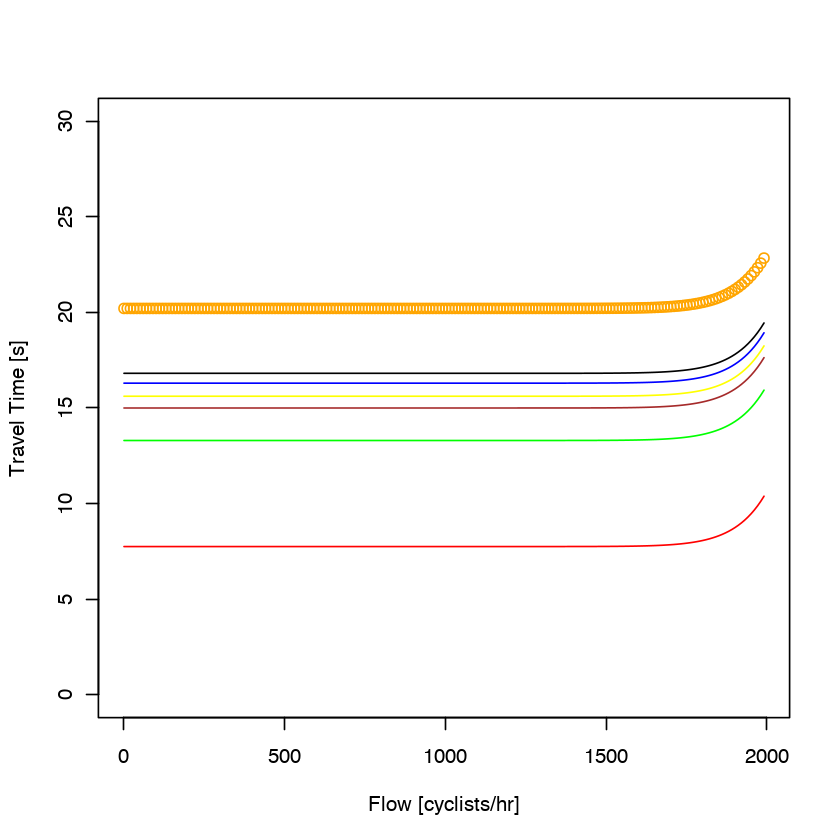

In [23]:
options(jupyter.plot_mimetypes = 'image/png')

plot(xCurve_flow,3600*yCurve_tt_g1
    , ylim = c(0,30)
    , col = 'orange', lty = 1
    , ylab = "Travel Time [s]", xlab = "Flow [cyclists/hr]")
#plot(tt ~ flow, data=df, xlab="Flow [cyclists/hour]", ylab="Travel Time [s]", 
#   main="Scatter Plot"
#    #, xlim = c(0,1000), ylim = c(0,60)
#    )

lines(xCurve_flow, 3600*yCurve_tt_g2, col = 'red', lty = 1) # BPR curve group 3
lines(xCurve_flow, 3600*yCurve_tt_g3, col = 'black', lty = 1) # BPR curve group 4
lines(xCurve_flow, 3600*yCurve_tt_g4, col = 'yellow', lty = 1) # BPR curve group 5
lines(xCurve_flow, 3600*yCurve_tt_g5, col = 'green', lty = 1) # BPR curve group 6
lines(xCurve_flow, 3600*yCurve_tt_g6, col = 'brown', lty = 1) # BPR curve group 7
lines(xCurve_flow, 3600*yCurve_tt_g7, col = 'blue', lty = 1) # BPR curve group 8